In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import os
from dotenv import load_dotenv
load_dotenv()

True

### **Rating histogram**
###### Histogram thể hiện số lượng solved so với rating 
###### Codeforces có rất nhiều bài dễ (rating 800–1200) để phục vụ newbie → cái cột đầu tiên thường cao.
###### Cũng có khá nhiều bài trung bình (1400–2200) vì đây là vùng thi đấu phổ biến nhất (Div2 A–C, Div3).
###### Bài rất khó (2600–3500) vẫn có số lượng kha khá vì Codeforces tồn tại từ 2010, ra hàng ngàn contests → dồn lại thì số lượng cũng nhiều.
###### => Nên histogram không đơn giản giảm dần theo rating.

c:\Users\Su\Desktop\Susois\NEU_scrapy\codeforces-scrapy\venv\Lib\site-packages\pymongo\pyopenssl_context.py:352: CryptographyDeprecationWarning: Parsed a serial number which wasn't positive (i.e., it was negative or zero), which is disallowed by RFC 5280. Loading this certificate will cause an exception in a future release of cryptography.
  _crypto.X509.from_cryptography(x509.load_der_x509_certificate(cert))


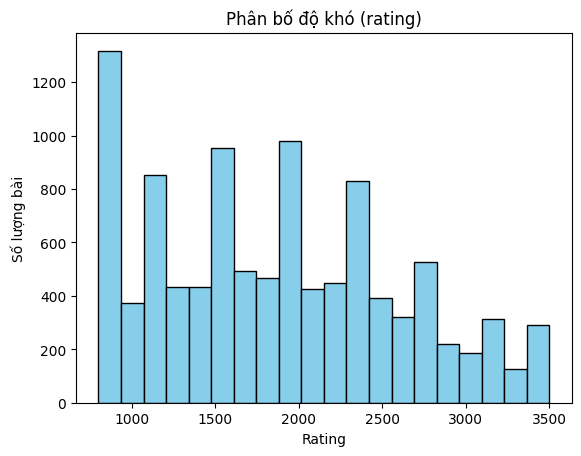

In [3]:
client = MongoClient(os.getenv("MONGODB_URI"))
db = client[os.getenv("MONGODB_DB")]
col = db[os.getenv("MONGODB_COLLECTION")]

data = list(col.find({}, {"rating": 1}))
df = pd.DataFrame(data)

plt.hist(df["rating"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Phân bố độ khó (rating)")
plt.xlabel("Rating")
plt.ylabel("Số lượng bài")
plt.show()

### **Tag <-> Contest**
###### Do chưa có cách tối ưu nên là chỉ vẽ trong 100 problems đầu tiên, tất cả trong db là 10000 dòng dữ liệu nên khi duyệt 2 for với độ phức tạp n^2 rất là lâu
###### Histogram thể hiện mạng lưới **contest <-> problems <-> tags**

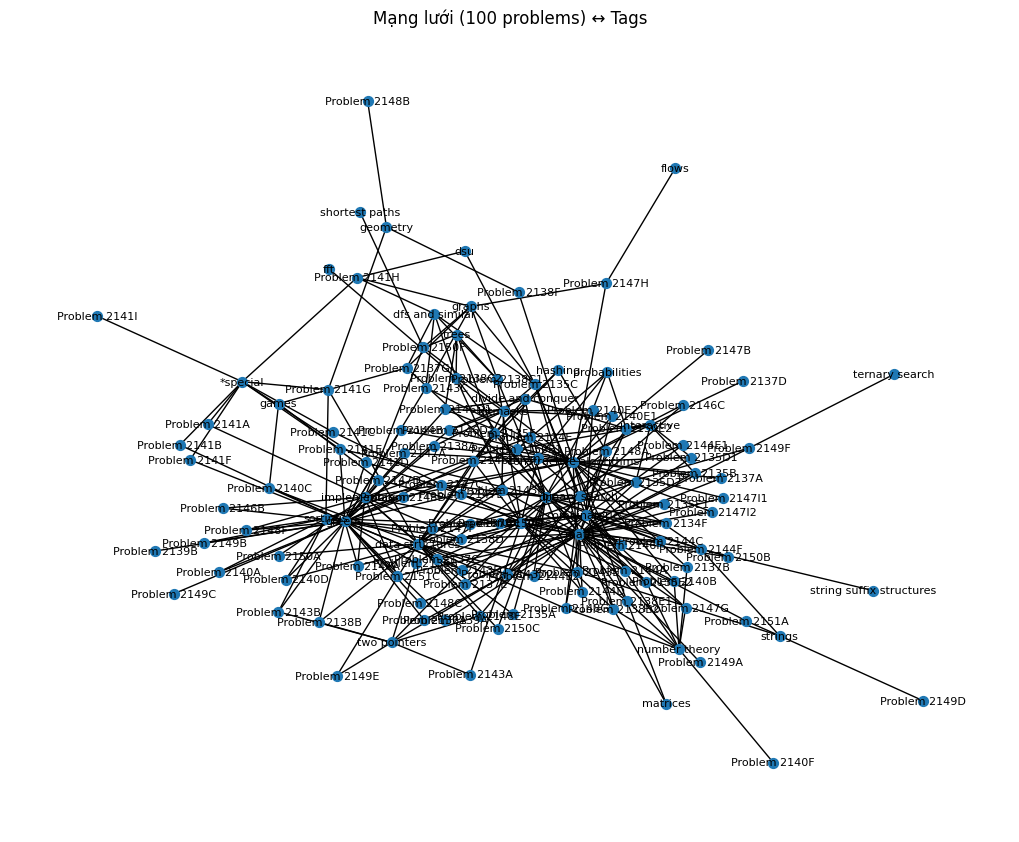

In [ ]:
G = nx.Graph()
for problem in col.find({}, {"problem_id": 1, "tags": 1}).limit(100):
    pid = problem.get("problem_id")
    if pid is None:
        continue
    problem_node = f"Problem {pid}"
    for tag in problem.get("tags", []):
        G.add_edge(problem_node, tag)

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.title("Mạng lưới (100 problems) ↔ Tags")
plt.show()


### **Top 10 Tags**

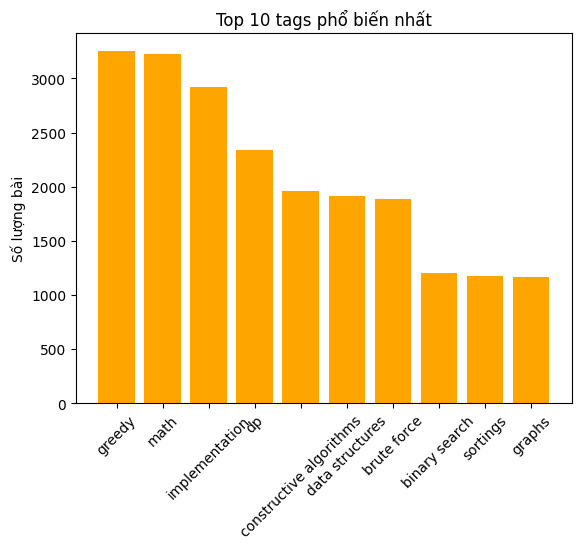

In [5]:
tags = [tag for problem in col.find({}, {"tags": 1}) for tag in problem.get("tags", [])]
tag_counts = Counter(tags).most_common(10)

tags, counts = zip(*tag_counts)

plt.bar(tags, counts, color="orange")
plt.xticks(rotation=45)
plt.title("Top 10 tags phổ biến nhất")
plt.ylabel("Số lượng bài")
plt.show()
